#  El Problema

Vamos a utilizar los datos de la competición de predicción de datos de terrorismo. 

El objetivo del ejercicio es por un lado realizar el proceso KDD con los Datasets obtenidos miediante Web Scrapping, para a continuacion realizar por alguno de los logaritmos prediccion de los mismos.


# Setting Preliminares

Antes de empezar cualquier análisis hay que asegurar que las librerías básicas y de uso general (numpy, pandas, etc.) están correctamente importadas. 

In [5]:
# carga de datos
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
import plotly.tools as tls
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go


Cargamos todas las librerias necesarias para nuestro estudio

In [6]:
# machine learning 
from feature_selector import FeatureSelector # Nos va a ayudar a realizar el número de missings, correlaciones, importancia de las variables, etc.

# machine learning 

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Import models from scikit learn module:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score


from sklearn.utils import resample,shuffle

# Carga de Datos

En primer lugar cargamos los datos dentro del entorno con las funcionalidades que nos permite Google Colab

In [ ]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
df = pd.read_excel("/content/atentados_terroristas_europa.xlsx") 

En primer lugar subimos los datos del dataset 


In [ ]:
df = upload_files()

Saving atentados_terroristas_europa.xlsx to atentados_terroristas_europa.xlsx
User uploaded file "atentados_terroristas_europa.xlsx" with length 434786 bytes


In [7]:
data_1="atentados_terroristas_europa"


In [8]:
data_1  = pd.read_excel(data_1 + ".xlsx", header=0, parse_dates=False, index_col=0)


In [41]:
frames = [data_1]
Terrorismo = pd.concat(frames)
Terrorismo=Terrorismo.drop_duplicates()
Terrorismo

,Country,City,Latitude,Longitude,Multiple,Success,Attacktype,Target_type,Group,Weapon_type,Nkill,Nwound
Year,,,,,,,,,,,,
2000,Kosovo,Peje,42.659809,20.307119,0,1,Bombing/Explosion,Private Citizens & Property,Unknown,Explosives,0,1
2000,Kosovo,Gorazhdec,42.640556,20.369722,0,0,Armed Assault,Private Citizens & Property,Unknown,Firearms,0,0
2000,Spain,Galdacano,43.230556,-2.845833,0,1,Armed Assault,Military,Unknown,Incendiary,0,1
2000,Spain,Guernica,43.317073,-2.678975,0,1,Armed Assault,Business,Unknown,Incendiary,0,0
2000,Germany,Erfurt,50.973734,11.022435,0,0,Armed Assault,Government (General),Autonomous Decorators,Incendiary,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020,New Caledonia,Goro,-22.336000,166.912000,0,1,Facility/Infrastructure Attack,Business,Unknown,Incendiary,0,0
2020,Netherlands,Neer,51.259826,5.989300,0,0,Bombing/Explosion,Journalists & Media,Unknown,Explosives,0,0
2020,Russia,Grozny,43.320228,45.654493,0,1,Armed Assault,Police,Caucasus Province of the Islamic State,Melee,3,1


In [10]:
Terrorismo.head()

,Country,City,Latitude,Longitude,Multiple,Success,Attacktype,Target_type,Group,Weapon_type,Nkill,Nwound
Year,,,,,,,,,,,,
2000,Kosovo,Peje,42.659809,20.307119,0,1,Bombing/Explosion,Private Citizens & Property,Unknown,Explosives,0,1
2000,Kosovo,Gorazhdec,42.640556,20.369722,0,0,Armed Assault,Private Citizens & Property,Unknown,Firearms,0,0
2000,Spain,Galdacano,43.230556,-2.845833,0,1,Armed Assault,Military,Unknown,Incendiary,0,1
2000,Spain,Guernica,43.317073,-2.678975,0,1,Armed Assault,Business,Unknown,Incendiary,0,0
2000,Germany,Erfurt,50.973734,11.022435,0,0,Armed Assault,Government (General),Autonomous Decorators,Incendiary,0,0


Quitamos las columnas redundantes que no aportan nada

In [ ]:
Terrorismo.drop(["Month", "Year", "country", "attacktype1", "region", "region_txt", "provstate", "weapsubtype1_txt"] , axis = 1, inplace = True)

KeyError: ignored

In [ ]:
Terrorismo.drop(['targtype1', 'weaptype1' , 'weapsubtype1'],axis =1, inplace = True)

KeyError: ignored

In [ ]:
Terrorismo.drop(['Day'],axis =1, inplace = True)

KeyError: ignored

In [ ]:
Terrorismo.head()

,Country,City,Latitude,Longitude,Multiple,Success,Attacktype,Target_type,Group,Weapon_type,Nkill,Nwound
Year,,,,,,,,,,,,
2000,Kosovo,Peje,42.659809,20.307119,0,1,Bombing/Explosion,Private Citizens & Property,Unknown,Explosives,0,1
2000,Kosovo,Gorazhdec,42.640556,20.369722,0,0,Armed Assault,Private Citizens & Property,Unknown,Firearms,0,0
2000,Spain,Galdacano,43.230556,-2.845833,0,1,Armed Assault,Military,Unknown,Incendiary,0,1
2000,Spain,Guernica,43.317073,-2.678975,0,1,Armed Assault,Business,Unknown,Incendiary,0,0
2000,Germany,Erfurt,50.973734,11.022435,0,0,Armed Assault,Government (General),Autonomous Decorators,Incendiary,0,0


Exporto una copia de seguridad en excel

In [11]:
Terrorismo.to_excel('Terrorismo.xlsx', index = False)

Veamos las cinco primeras lineas para tener una idea global

In [ ]:
Terrorismo.head()

,Country,City,Latitude,Longitude,Multiple,Success,Attacktype,Target_type,Group,Weapon_type,Nkill,Nwound
Year,,,,,,,,,,,,
2000,Kosovo,Peje,42.659809,20.307119,0,1,Bombing/Explosion,Private Citizens & Property,Unknown,Explosives,0,1
2000,Kosovo,Gorazhdec,42.640556,20.369722,0,0,Armed Assault,Private Citizens & Property,Unknown,Firearms,0,0
2000,Spain,Galdacano,43.230556,-2.845833,0,1,Armed Assault,Military,Unknown,Incendiary,0,1
2000,Spain,Guernica,43.317073,-2.678975,0,1,Armed Assault,Business,Unknown,Incendiary,0,0
2000,Germany,Erfurt,50.973734,11.022435,0,0,Armed Assault,Government (General),Autonomous Decorators,Incendiary,0,0


Veamos que tipo de datos tiene el dataset

In [39]:
Terrorismo=Terrorismo.reset_index()

In [ ]:
Terrorismo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5017 entries, 0 to 5016
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         5017 non-null   int64  
 1   Country      5017 non-null   object 
 2   City         5017 non-null   object 
 3   Latitude     5017 non-null   float64
 4   Longitude    5017 non-null   float64
 5   Multiple     5017 non-null   int64  
 6   Success      5017 non-null   int64  
 7   Attacktype   5017 non-null   object 
 8   Target_type  5017 non-null   object 
 9   Group        5017 non-null   object 
 10  Weapon_type  5017 non-null   object 
 11  Nkill        5017 non-null   int64  
 12  Nwound       5017 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 509.7+ KB


*Tenemos* 5017 filas y 13 columnas.

In [ ]:
print(Terrorismo.dtypes)

Year             int64
Country         object
City            object
Latitude       float64
Longitude      float64
Multiple         int64
Success          int64
Attacktype      object
Target_type     object
Group           object
Weapon_type     object
Nkill            int64
Nwound           int64
dtype: object


In [ ]:
print(Terrorismo.shape)

(5017, 13)


Veamos el nombre de las columnas en nuestro dataset

In [12]:
Terrorismo.columns

Index(['Country', 'City', 'Latitude', 'Longitude', 'Multiple', 'Success',
       'Attacktype', 'Target_type', 'Group', 'Weapon_type', 'Nkill', 'Nwound'],
      dtype='object')

Veamos las variables que son numericas

In [ ]:
df_numeric = Terrorismo.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Year' 'Latitude' 'Longitude' 'Multiple' 'Success' 'Nkill' 'Nwound']


Veamos cuales son no numericas

In [ ]:
df_non_numeric = Terrorismo.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Country' 'City' 'Attacktype' 'Target_type' 'Group' 'Weapon_type']


Veamos si existen registros duplicados

In [ ]:
Terrorismo.duplicated().value_counts()

False    5017
dtype: int64

In [13]:
Terrorismo.drop_duplicates(subset='Country' and 'Country', keep=False)

,Country,City,Latitude,Longitude,Multiple,Success,Attacktype,Target_type,Group,Weapon_type,Nkill,Nwound
Year,,,,,,,,,,,,
2008,Romania,Bucharest,44.433333,26.1,0,1,Armed Assault,Business,Unknown,Incendiary,0,1


In [ ]:
Terrorismo.duplicated().drop_duplicates(keep=False)

Series([], dtype: bool)

Vemos que no hay registros duplicados

Veamos que valores estan missing

In [14]:
Terrorismo.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Country   City  Latitude  Longitude  Multiple  Success  Attacktype  \
Year                                                                       
2000    False  False     False      False     False    False       False   
2000    False  False     False      False     False    False       False   
2000    False  False     False      False     False    False       False   
2000    False  False     False      False     False    False       False   
2000    False  False     False      False     False    False       False   
...       ...    ...       ...        ...       ...      ...         ...   
2020    False  False     False      False     False    False       False   
2020    False  False     False      False     False    False       False   
2020    False  False     False      False     False    False       False   
2020    False  False     False      False     False    False       False   
2020    False  False     F

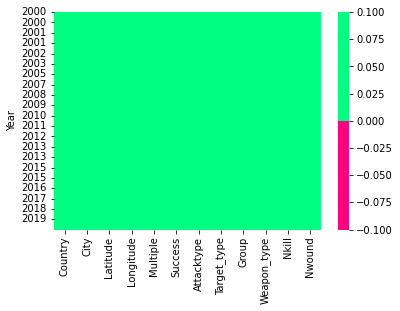

In [15]:
cols = Terrorismo.columns[:15] # primeras 15 columnas
colours = ['#ff0080', '#00ff80'] # especificamos los colores - rosa es no missing, verde es missing
sns.heatmap(Terrorismo[cols].isnull(), cmap=sns.color_palette(colours))

Otro de ellos es usando un heatmap, en el cuál veremos en diferentes colores qué columnas tienen más missings. Este gráfico es muy útil pues es muy visual y es fácil de entender.

Podemos ver a continuación el porcentaje de missing values que tiene cada una de las variables. Para ello, iteramos sobre un bucle for por cada una de las columnas de nuestro dataset.

Country - 0%
City - 0%
Latitude - 0%
Longitude - 0%
Multiple - 0%
Success - 0%
Attacktype - 0%
Target_type - 0%
Group - 0%
Weapon_type - 0%
Nkill - 0%
Nwound - 0%


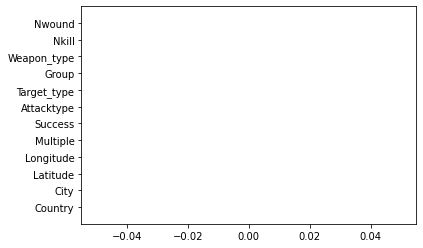

In [16]:
for col in Terrorismo.columns:
    pct_missing = np.mean(Terrorismo[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    plt.barh(col, round(pct_missing*100))

Otra forma para ver el número de missings es usando Feature Selector (). Realizo el ejemplo a continuación llamando al proceso con nuestra base de datos principal

In [17]:
fs = FeatureSelector(data = Terrorismo, labels = Terrorismo.columns)

**Muestro** solo las variables que tienen más de un 80% de valores perdidos. Podemos ver que no tenemos variables con más del 80% de missings

In [18]:
fs.identify_missing(missing_threshold=0.8)

0 features with greater than 0.80 missing values.



Este es otro método para ver el porcentaje de missings de las variables que contienen missings

Veamos si es correcto que ya no hay duplicados

In [19]:
fs.missing_stats.head()

,missing_fraction
Country,0.0
City,0.0
Latitude,0.0
Longitude,0.0
Multiple,0.0


Creamos un histograma con la distribución de los valores missings.

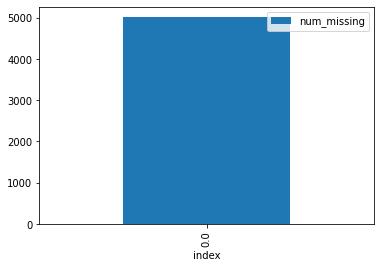

In [20]:
Terrorismo_missings=Terrorismo.copy()
for col in Terrorismo_missings.columns:
    missing = Terrorismo_missings[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        Terrorismo_missings['{}_ismissing'.format(col)] = missing


ismissing_cols = [col for col in Terrorismo_missings.columns if 'ismissing' in col]

Terrorismo_missings['num_missing'] = Terrorismo_missings[ismissing_cols].sum(axis=1)

Terrorismo_missings['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

A continuación estudiaremos las filas que tienen muchos missings values. Supongo que si tienen más de 12 missings values esa fila ya no aportaría mucho valor

In [21]:
# drop rows with a lot of missing values.
ind_missing = Terrorismo_missings[Terrorismo_missings['num_missing'] > 12].index
df_less_missing_rows = Terrorismo_missings.drop(ind_missing, axis=0)
print(df_less_missing_rows.shape)

(5017, 13)


Con la siguiente función, comprobamos qué variables tenemos con más de un 80% de missings. Podemos ver, que no tengo ninguna variable con más de un 80% de missing

In [22]:
def filter_na(datos, nivelna = 0.8): # Porcentaje de missings por el que queremos filtrar
    por_na = datos.isnull().mean() # calculamos la media
    names =list(por_na[por_na < nivelna].index) #elimina las variables <= que ese valor
    return pd.DataFrame(datos.filter(names, axis = 1))

Terrorismo=filter_na(Terrorismo) #devuelve el dataset filtrado

print(Terrorismo.shape)

(5017, 12)


Vemos si nuestro dataset está balanceado por paises. Para ello vemos el número de filas que tenemos de cada pais. Como podemos ver, el dataset está desequilibrado en cuanto al numero de atentados.

In [23]:
Terrorismo.groupby(['Country'])['Country'].count()

Country
Belarus             11
Belgium             28
Bosnia              33
Bulgaria            18
Denmark             12
Estonia              3
Finland             21
France             405
Germany            255
Greece             398
Hungary              8
Iceland              2
Ireland            154
Italy              154
Kosovo             152
Moldova              4
Montenegro           8
Netherlands         70
New Caledonia       10
Norway              13
Poland               7
Portugal             2
Romania              1
Russia            1699
Serbia              46
Spain              383
Sweden              88
Switzerland         19
United Kingdom    1013
Name: Country, dtype: int64

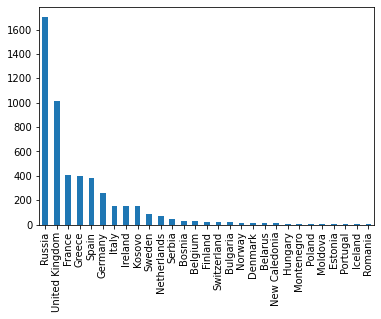

In [24]:
# bar chart -  distribution of a categorical variable
Terrorismo['Country'].value_counts().plot.bar()

Estudiamos las variables que tienen una correlación lineal superior al 70% Vemos que hay dos variables numéricas que están muy correlacionadas entre sí

In [25]:
fs.identify_collinear(correlation_threshold=0.7)

1 features with a correlation magnitude greater than 0.70.



Las dos variables que están muy correlacionadas entre sí son Nkill y Nwound, que están directamente relacionadas por lo que lo tendremos en cuenta para posteriormente, cuando añadamos el resto de variables (de tablas externas) eliminarla ya que sería redundante (esto lo hago en uno de los pasos finales, tras haber analizado más el dataset)

In [26]:
collinear_features = fs.ops['collinear']
collinear=fs.record_collinear
collinear.sort_values(by='corr_value', ascending=False)

,drop_feature,corr_feature,corr_value
0,Nwound,Nkill,0.717605


In [ ]:
fs = FeatureSelector(data = Terrorismo, labels = Terrorismo.columns)

Comienzo a transformar el formato de las variables del dataset para poder realizar un mejor estudio de las correlaciones entre variables, ya que tengo muchas variables que no son numéricas y quiero transformarlas a numéricas para poder analizarlas mejor.

In [27]:
Terrorismo.isnull().mean()*100 

Country        0.0
City           0.0
Latitude       0.0
Longitude      0.0
Multiple       0.0
Success        0.0
Attacktype     0.0
Target_type    0.0
Group          0.0
Weapon_type    0.0
Nkill          0.0
Nwound         0.0
dtype: float64

In [28]:
fs.identify_collinear(correlation_threshold=0.9)

0 features with a correlation magnitude greater than 0.90.



Ahora procedemos a adjuntar otros dataset de poblacion y de desempleo

In [ ]:
df = upload_files()

Saving Población.xlsx to Población.xlsx
Saving Unemployed.xlsx to Unemployed.xlsx
User uploaded file "Población.xlsx" with length 9418831 bytes
User uploaded file "Unemployed.xlsx" with length 9785422 bytes


In [29]:
Unemployed  = pd.read_excel("Unemployed.xlsx", header=0, parse_dates=False, index_col="Year")
Unemployed=Unemployed.reset_index()
Unemployed

,Year,Country,unemployed
0,2010,Albania,117.323
1,2011,Albania,78.547
2,2013,Albania,104.797
3,2014,Albania,147.946
4,2015,Albania,143.224
...,...,...,...
376,2015,United Kingdom,2078.671
377,2016,United Kingdom,1948.535
378,2017,United Kingdom,1846.389
379,2018,United Kingdom,1735.319


In [30]:
Unemployed  = pd.read_excel("Unemployed.xlsx", header=0, parse_dates=False, index_col="Year")
Unemployed

,Country,unemployed
Year,,
2010,Albania,117.323
2011,Albania,78.547
2013,Albania,104.797
2014,Albania,147.946
2015,Albania,143.224
...,...,...
2015,United Kingdom,2078.671
2016,United Kingdom,1948.535
2017,United Kingdom,1846.389


In [ ]:
df = upload_files()

Saving Población.xlsx to Población.xlsx
User uploaded file "Población.xlsx" with length 5640744 bytes


In [31]:
Población  = pd.read_excel("Población.xlsx", header=0, parse_dates=False, index_col="Year")
Población

,Country,Population
Year,,
2010,Austria,8361069.0
2010,Belgium,10895589.0
2010,Denmark,5543819.0
2010,Estonia,1331475.0
2010,Finland,5363341.0
...,...,...
2021,Switzerland,8701914.0
2021,United Kingdom,67350695.0
2021,Bulgaria,6898621.0


Ahora procedo a fusionar las tablas por paises

In [32]:
Unemployed=Unemployed.merge(Población, on='Country', how='right')
Unemployed

,Country,unemployed,Population
0,Austria,132.713,8361069.0
1,Austria,142.273,8361069.0
2,Austria,157.326,8361069.0
3,Austria,176.166,8361069.0
4,Austria,177.974,8361069.0
...,...,...,...
3173,United Kingdom,1735.319,67350695.0
3174,United Kingdom,1768.357,67350695.0
3175,Bulgaria,NaN,6898621.0
3176,Croatia,NaN,4024898.0


Procedemos a crear indices por paises

In [33]:
Unemployed

,Country,unemployed,Population
0,Austria,132.713,8361069.0
1,Austria,142.273,8361069.0
2,Austria,157.326,8361069.0
3,Austria,176.166,8361069.0
4,Austria,177.974,8361069.0
...,...,...,...
3173,United Kingdom,1735.319,67350695.0
3174,United Kingdom,1768.357,67350695.0
3175,Bulgaria,NaN,6898621.0
3176,Croatia,NaN,4024898.0


In [34]:
Unemployed.duplicated().value_counts()

False    3178
dtype: int64

In [35]:
Unemployed.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Country  unemployed  Population
0       False       False       False
1       False       False       False
2       False       False       False
3       False       False       False
4       False       False       False
...       ...         ...         ...
3173    False       False       False
3174    False       False       False
3175    False        True       False
3176    False        True       False
3177    False        True       False

[3178 rows x 3 columns]>

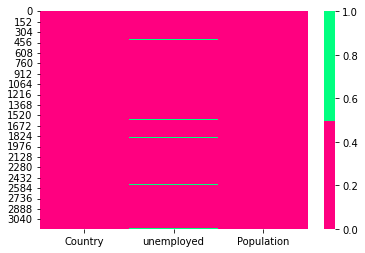

In [36]:
cols = Unemployed.columns[:15] # primeras 15 columnas
colours = ['#ff0080', '#00ff80'] # especificamos los colores - rosa es no missing, verde es missing
sns.heatmap(Unemployed[cols].isnull(), cmap=sns.color_palette(colours))

Country - 0%
unemployed - 2%
Population - 0%


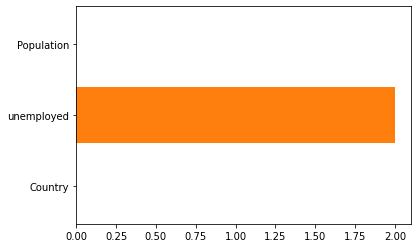

In [37]:
for col in Unemployed.columns:
    pct_missing = np.mean(Unemployed[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    plt.barh(col, round(pct_missing*100))

In [45]:
Terrorismo=Terrorismo.reset_index()
Terrorismo.head()


,Year,Country,City,Latitude,Longitude,Multiple,Success,Attacktype,Target_type,Group,Weapon_type,Nkill,Nwound
0,2000,Kosovo,Peje,42.659809,20.307119,0,1,Bombing/Explosion,Private Citizens & Property,Unknown,Explosives,0,1
1,2000,Kosovo,Gorazhdec,42.640556,20.369722,0,0,Armed Assault,Private Citizens & Property,Unknown,Firearms,0,0
2,2000,Spain,Galdacano,43.230556,-2.845833,0,1,Armed Assault,Military,Unknown,Incendiary,0,1
3,2000,Spain,Guernica,43.317073,-2.678975,0,1,Armed Assault,Business,Unknown,Incendiary,0,0
4,2000,Germany,Erfurt,50.973734,11.022435,0,0,Armed Assault,Government (General),Autonomous Decorators,Incendiary,0,0


In [46]:
Terrorismo=Terrorismo.merge(Unemployed, on=('Country' ), how='left')
Terrorismo

,Year,Country,City,Latitude,Longitude,Multiple,Success,Attacktype,Target_type,Group,Weapon_type,Nkill,Nwound,unemployed,Population
0,2000,Kosovo,Peje,42.659809,20.307119,0,1,Bombing/Explosion,Private Citizens & Property,Unknown,Explosives,0,1,NaN,NaN
1,2000,Kosovo,Gorazhdec,42.640556,20.369722,0,0,Armed Assault,Private Citizens & Property,Unknown,Firearms,0,0,NaN,NaN
2,2000,Spain,Galdacano,43.230556,-2.845833,0,1,Armed Assault,Military,Unknown,Incendiary,0,1,1401.967,46562483.0
3,2000,Spain,Galdacano,43.230556,-2.845833,0,1,Armed Assault,Military,Unknown,Incendiary,0,1,1504.993,46562483.0
4,2000,Spain,Galdacano,43.230556,-2.845833,0,1,Armed Assault,Military,Unknown,Incendiary,0,1,1697.113,46562483.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414633,2020,Germany,Leipzig,51.342239,12.374772,0,1,Facility/Infrastructure Attack,Military,Left-wing extremists,Incendiary,0,0,1540.765,83129285.0
414634,2020,Germany,Leipzig,51.342239,12.374772,0,1,Facility/Infrastructure Attack,Military,Left-wing extremists,Incendiary,0,0,1363.770,83129285.0
414635,2020,Germany,Leipzig,51.342239,12.374772,0,1,Facility/Infrastructure Attack,Military,Left-wing extremists,Incendiary,0,0,1266.974,83129285.0
414636,2020,Germany,Leipzig,51.342239,12.374772,0,1,Facility/Infrastructure Attack,Military,Left-wing extremists,Incendiary,0,0,1261.311,83129285.0


In [ ]:
Terrorismo.drop(["Population_x", "index"] , axis = 1, inplace = True)

In [ ]:
Terrorismo=Terrorismo.reset_index()

In [47]:
Terrorismo.head()

,Year,Country,City,Latitude,Longitude,Multiple,Success,Attacktype,Target_type,Group,Weapon_type,Nkill,Nwound,unemployed,Population
0,2000,Kosovo,Peje,42.659809,20.307119,0,1,Bombing/Explosion,Private Citizens & Property,Unknown,Explosives,0,1,NaN,NaN
1,2000,Kosovo,Gorazhdec,42.640556,20.369722,0,0,Armed Assault,Private Citizens & Property,Unknown,Firearms,0,0,NaN,NaN
2,2000,Spain,Galdacano,43.230556,-2.845833,0,1,Armed Assault,Military,Unknown,Incendiary,0,1,1401.967,46562483.0
3,2000,Spain,Galdacano,43.230556,-2.845833,0,1,Armed Assault,Military,Unknown,Incendiary,0,1,1504.993,46562483.0
4,2000,Spain,Galdacano,43.230556,-2.845833,0,1,Armed Assault,Military,Unknown,Incendiary,0,1,1697.113,46562483.0


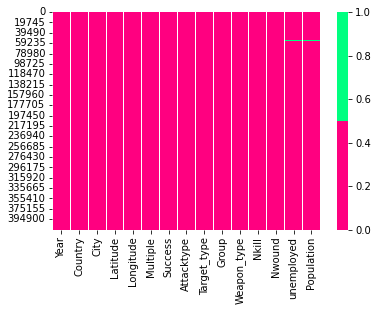

In [48]:
cols = Terrorismo.columns[:15] # primeras 15 columnas
colours = ['#ff0080', '#00ff80'] # especificamos los colores - rosa es no missing, verde es missing
sns.heatmap(Terrorismo[cols].isnull(), cmap=sns.color_palette(colours))

Year - 0%
Country - 0%
City - 0%
Latitude - 0%
Longitude - 0%
Multiple - 0%
Success - 0%
Attacktype - 0%
Target_type - 0%
Group - 0%
Weapon_type - 0%
Nkill - 0%
Nwound - 0%
unemployed - 0%
Population - 0%


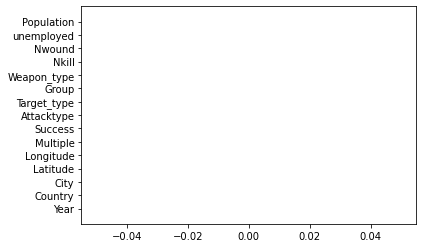

In [49]:
for col in Terrorismo.columns:
    pct_missing = np.mean(Terrorismo[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    plt.barh(col, round(pct_missing*100))

In [50]:
fs.identify_collinear(correlation_threshold=0.7)

1 features with a correlation magnitude greater than 0.70.



In [51]:
collinear_features = fs.ops['collinear']
collinear=fs.record_collinear
collinear.sort_values(by='corr_value', ascending=False)

,drop_feature,corr_feature,corr_value
0,Nwound,Nkill,0.717605


Hacemos lo mismo para el dataset de poblacion

Exporto el dataset con las columnas adicionales

In [52]:
Terrorismo.to_excel('Terrorismo.xlsx', index = False)

In [53]:
Terrorismo

,Year,Country,City,Latitude,Longitude,Multiple,Success,Attacktype,Target_type,Group,Weapon_type,Nkill,Nwound,unemployed,Population
0,2000,Kosovo,Peje,42.659809,20.307119,0,1,Bombing/Explosion,Private Citizens & Property,Unknown,Explosives,0,1,NaN,NaN
1,2000,Kosovo,Gorazhdec,42.640556,20.369722,0,0,Armed Assault,Private Citizens & Property,Unknown,Firearms,0,0,NaN,NaN
2,2000,Spain,Galdacano,43.230556,-2.845833,0,1,Armed Assault,Military,Unknown,Incendiary,0,1,1401.967,46562483.0
3,2000,Spain,Galdacano,43.230556,-2.845833,0,1,Armed Assault,Military,Unknown,Incendiary,0,1,1504.993,46562483.0
4,2000,Spain,Galdacano,43.230556,-2.845833,0,1,Armed Assault,Military,Unknown,Incendiary,0,1,1697.113,46562483.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414633,2020,Germany,Leipzig,51.342239,12.374772,0,1,Facility/Infrastructure Attack,Military,Left-wing extremists,Incendiary,0,0,1540.765,83129285.0
414634,2020,Germany,Leipzig,51.342239,12.374772,0,1,Facility/Infrastructure Attack,Military,Left-wing extremists,Incendiary,0,0,1363.770,83129285.0
414635,2020,Germany,Leipzig,51.342239,12.374772,0,1,Facility/Infrastructure Attack,Military,Left-wing extremists,Incendiary,0,0,1266.974,83129285.0
414636,2020,Germany,Leipzig,51.342239,12.374772,0,1,Facility/Infrastructure Attack,Military,Left-wing extremists,Incendiary,0,0,1261.311,83129285.0


Comprobamos las columnas despues de haber metido los datos adicionales

In [54]:
Terrorismo.columns

Index(['Year', 'Country', 'City', 'Latitude', 'Longitude', 'Multiple',
       'Success', 'Attacktype', 'Target_type', 'Group', 'Weapon_type', 'Nkill',
       'Nwound', 'unemployed', 'Population'],
      dtype='object')

Ahora voy a usar Feature Selector para el número de missings de nuevo (para haber qué tal ha quedado después de unir las tablas)

In [55]:
fs = FeatureSelector(data = Terrorismo, labels = Terrorismo.columns)

In [56]:
fs.identify_missing(missing_threshold=0.8)

0 features with greater than 0.80 missing values.



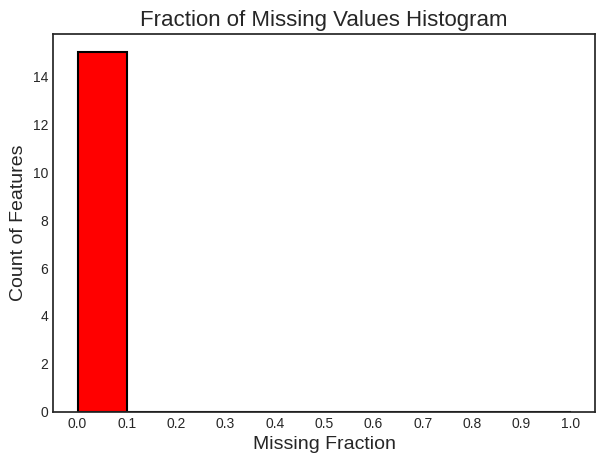

In [57]:
fs.plot_missing()

Confirmamos que no tenemos missings, viendo el porcentaje de missings

In [58]:
Terrorismo.isnull().mean()*100

Year           0.000000
Country        0.000000
City           0.000000
Latitude       0.000000
Longitude      0.000000
Multiple       0.000000
Success        0.000000
Attacktype     0.000000
Target_type    0.000000
Group          0.000000
Weapon_type    0.000000
Nkill          0.000000
Nwound         0.000000
unemployed     0.478007
Population     0.478007
dtype: float64

Analizamos con el dataset de la unión final, qué variables tienen una correlación lineal superior al 80% y vemos que 12 variables tienen una correlación superior al 90%. Guardamos esta información para posteriormente, casi al final, elimianr las variables muy correlacionadas o con carencia de importancia

In [63]:
fs.identify_collinear(correlation_threshold=0.99)

0 features with a correlation magnitude greater than 0.99.



In [64]:
Terrorismo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414638 entries, 0 to 414637
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         414638 non-null  int64  
 1   Country      414638 non-null  object 
 2   City         414638 non-null  object 
 3   Latitude     414638 non-null  float64
 4   Longitude    414638 non-null  float64
 5   Multiple     414638 non-null  int64  
 6   Success      414638 non-null  int64  
 7   Attacktype   414638 non-null  object 
 8   Target_type  414638 non-null  object 
 9   Group        414638 non-null  object 
 10  Weapon_type  414638 non-null  object 
 11  Nkill        414638 non-null  int64  
 12  Nwound       414638 non-null  int64  
 13  unemployed   412656 non-null  float64
 14  Population   412656 non-null  float64
dtypes: float64(4), int64(5), object(6)
memory usage: 50.6+ MB


Podemos ver la correlación lineal entre variables también usando un mapa de calor

Podemos ver que las variables más correlacionadas son el rating del comentario con el rating de la ubicación.
Las variables que aparecen en rojo en el mapa del calor inferior, son las que más relacionadas están entre sí de forma lineal. Podemos ver la correlación en valor en la tabla superior

4 features with a correlation magnitude greater than 0.50.



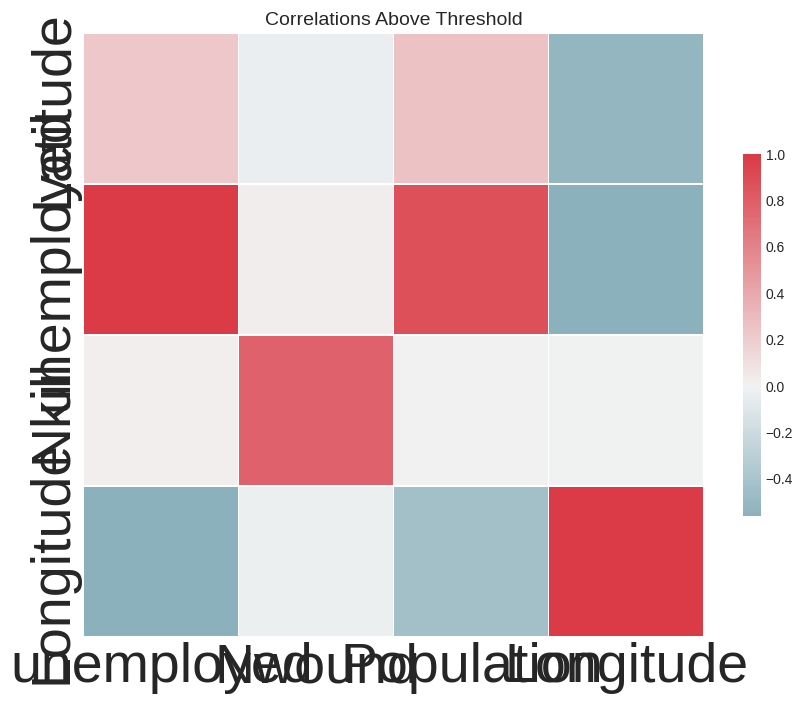

In [73]:
fs.identify_collinear(correlation_threshold=0.50)
fs.plot_collinear()